# 1. Import Required Libraries
Start by importing the necessary libraries for the SVM model and evaluation.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# 2: Loading the Data
We start by loading the data
- **X_train.txt & X_test.txt**: Sensor readings (features).
- **y_train.txt & y_test.txt**: Labels (activities).
- **subject_train.txt & subject_test.txt**: Subject IDs (who performed the activity).
- **features.txt**: Feature names (names of the 561 sensor readings).
- **activity_labels.txt**: Activity names corresponding to the labels.

In [5]:
# Load features and activity labels
features = pd.read_csv('UCI HAR Dataset/features.txt', header=None, delim_whitespace=True)
activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', header=None, delim_whitespace=True)

# Load train and test data (features)
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)

# Load train and test labels (activity IDs)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, delim_whitespace=True)

# Load train and test subject data (subject IDs)
subject_train = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None, delim_whitespace=True)
subject_test = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None, delim_whitespace=True)

C:\Users\susha\AppData\Local\Temp\ipykernel_23524\2894603299.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('UCI HAR Dataset/features.txt', header=None, delim_whitespace=True)
C:\Users\susha\AppData\Local\Temp\ipykernel_23524\2894603299.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', header=None, delim_whitespace=True)
C:\Users\susha\AppData\Local\Temp\ipykernel_23524\2894603299.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
C:\Users\susha\AppData\Local\Temp\ipykernel_23524\2894603299.py:7: FutureWar

# 3: Initialize and Train the SVM Model
Here,I initialized an SVM classifier and fit it on the training data (X_train, y_train).
Kernel: We're using the linear kernel because it works well for linearly separable data

In [7]:
y_train = y_train.to_numpy().ravel()

# Initialize SVM classifier
svm_model = SVC(kernel='linear')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

# 4: Model Predictions
Once the model is trained, we can make predictions on the validation data

In [9]:
# Predict on validation data
y_pred = svm_model.predict(X_test)

# 5: Evaluating Model Performance
I Evaluated the model performance of the SVM model using various metrics like classification report, confusion matrix, and accuracy score.

## 5.1 Classification report
The classification report provides key performance metrics for each class, including:

Precision: Out of all predicted positives, how many were actually positive.
Recall: Out of all actual positives, how many were correctly predicted.
F1-Score: The harmonic mean of precision and recall.

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.98      0.96      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.89      0.92       491
           5       0.91      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



## 5.2 Confusion Matrix
The confusion matrix is a table used to evaluate the performance of the model, showing how many instances were correctly/incorrectly predicted.


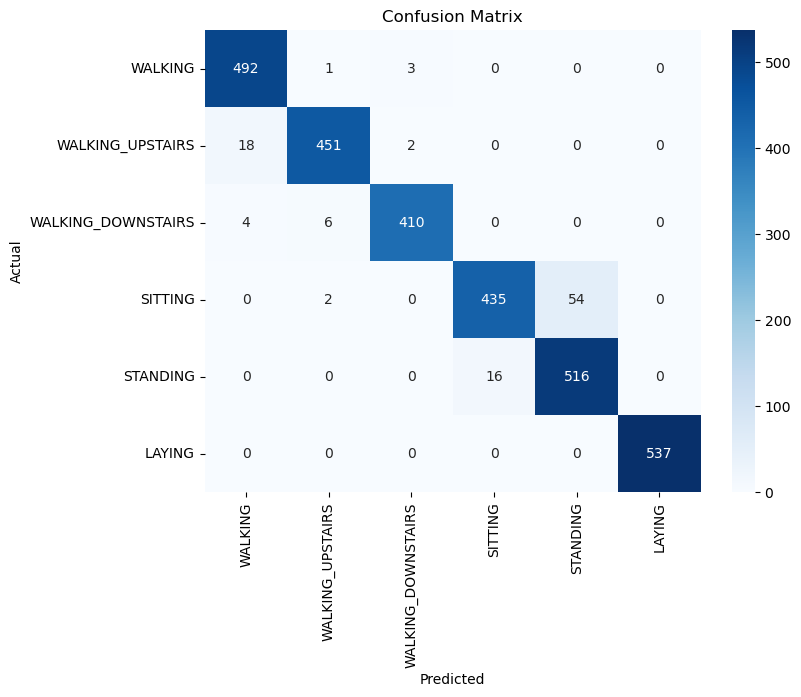

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels[1], yticklabels=activity_labels[1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5.3 Accuracy Score
The accuracy score will give you the percentage of correct predictions.

In [16]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.40%


# 6: Testing the accuracy of other kernel types
I initially tested the accuracy of linear but I just wanted to check if other kernels give any better results, So I tried Linear, Polynomial, Radial bias function, and Sigmoid function

## 6.1: Fetching the Accuracy of different kernels 

In [19]:
# List of kernel types to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

# Iterate through each kernel type, train an SVM, and calculate the accuracy
for kernel in kernels:
    # Initialize SVM classifier with the current kernel
    svm_model = SVC(kernel=kernel)
    
    # Fit the model on the training data
    svm_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create a DataFrame to store the kernel types and corresponding accuracies
accuracy_df = pd.DataFrame({
    'Kernel': kernels,
    'Accuracy': accuracies
})

# Print the accuracies for each kernel
print(accuracy_df)

    Kernel  Accuracy
0   linear  0.964031
1     poly  0.957923
2      rbf  0.950458
3  sigmoid  0.860536


## 6.1: Visualising the performance of different kernels

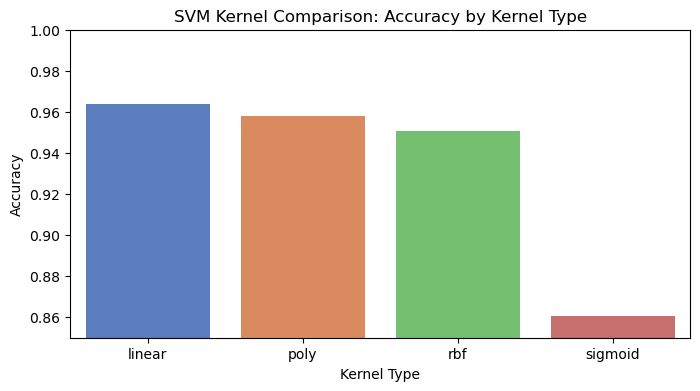

In [21]:
# Plot a bar chart of the accuracies for each kernel
plt.figure(figsize=(8,4))
sns.barplot(x='Kernel', y='Accuracy', data=accuracy_df, hue='Kernel', palette='muted')
plt.title('SVM Kernel Comparison: Accuracy by Kernel Type')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1) 
plt.show()

# 7: Hyperparameter Tuning (Just for exploration purposes)
Tried to tune the hyperparameters of the SVM, such as C (regularization parameter) using a 5 fold cross-validation technique, and explore other kernels like RBF, Polynomial and Sigmoid. 

## 7.1 Fetching accuracies for different hyperparameters

In [24]:
# Hyperparameter grid
param_grid = {'C': [0.1, 0.5,1,5, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Perform Grid Search and fit model
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Tested Hyperparameters and their corresponding Accuracy:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"Params: {params}, Accuracy: {mean_score:.4f}")

Tested Hyperparameters and their corresponding Accuracy:
Params: {'C': 0.1, 'kernel': 'linear'}, Accuracy: 0.9381
Params: {'C': 0.1, 'kernel': 'rbf'}, Accuracy: 0.8904
Params: {'C': 0.1, 'kernel': 'poly'}, Accuracy: 0.9266
Params: {'C': 0.1, 'kernel': 'sigmoid'}, Accuracy: 0.5672
Params: {'C': 0.5, 'kernel': 'linear'}, Accuracy: 0.9421
Params: {'C': 0.5, 'kernel': 'rbf'}, Accuracy: 0.9192
Params: {'C': 0.5, 'kernel': 'poly'}, Accuracy: 0.9393
Params: {'C': 0.5, 'kernel': 'sigmoid'}, Accuracy: 0.7861
Params: {'C': 1, 'kernel': 'linear'}, Accuracy: 0.9408
Params: {'C': 1, 'kernel': 'rbf'}, Accuracy: 0.9313
Params: {'C': 1, 'kernel': 'poly'}, Accuracy: 0.9407
Params: {'C': 1, 'kernel': 'sigmoid'}, Accuracy: 0.8421
Params: {'C': 5, 'kernel': 'linear'}, Accuracy: 0.9387
Params: {'C': 5, 'kernel': 'rbf'}, Accuracy: 0.9403
Params: {'C': 5, 'kernel': 'poly'}, Accuracy: 0.9448
Params: {'C': 5, 'kernel': 'sigmoid'}, Accuracy: 0.8494
Params: {'C': 10, 'kernel': 'linear'}, Accuracy: 0.9373
Params:

## 7.2: Plotting the Graph of different parameters

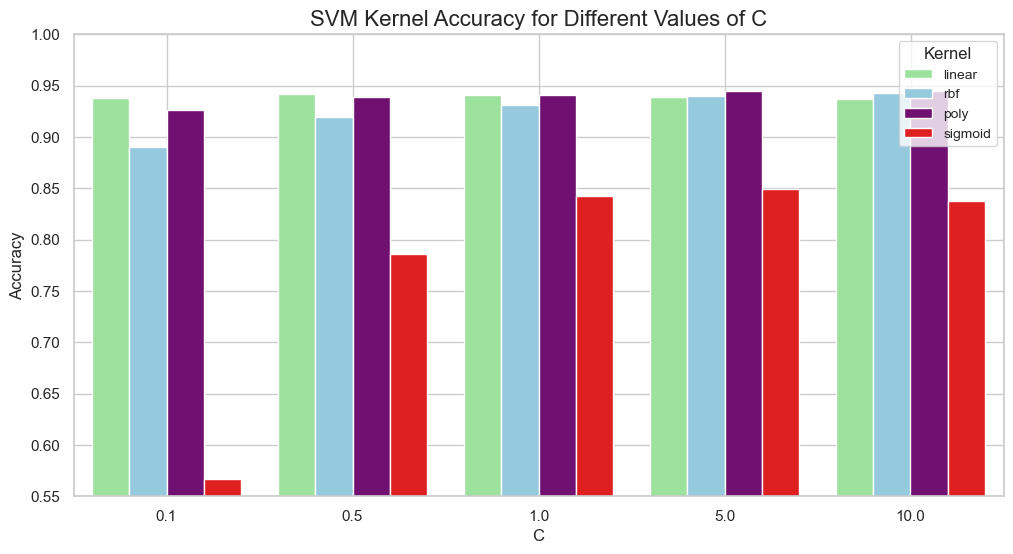

In [40]:
# Data from the table
data = {
    "C": [0.1, 0.5, 1, 5, 10] * 4,
    "Kernel": ["linear"] * 5 + ["rbf"] * 5 + ["poly"] * 5 + ["sigmoid"] * 5,
    "Accuracy": [
        0.9381, 0.9421, 0.9408, 0.9387, 0.9373,  # linear
        0.8904, 0.9192, 0.9313, 0.9403, 0.9426,  # rbf
        0.9266, 0.9393, 0.9407, 0.9448, 0.9449,  # poly
        0.5672, 0.7861, 0.8421, 0.8494, 0.8379,  # sigmoid
    ],
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x="C",
    y="Accuracy",
    hue="Kernel",
    palette={"linear": "lightgreen", "rbf": "skyblue", "poly": "purple", "sigmoid": "red"},
)

# Customize the plot
plt.title("SVM Kernel Accuracy for Different Values of C", fontsize=16)
plt.xlabel("C", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(title="Kernel", fontsize=10, title_fontsize=12)
plt.ylim(0.55, 1) 
plt.grid(True)
plt.show()

# SVM is executed successfully